Import Packages

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns

Create the DataFrames

- DataFrame --> 2 dimensional labeled data structure with columns and rows. Much like a spreadsheet

In [2]:
df_temp = pd.read_csv("C:/Users/Tyler/Documents/Python Projects/Filter-Merge-Sort Data in Python Pandas/tempYearly.csv")
df_rain = pd.read_csv("C:/Users/Tyler/Documents/Python Projects/Filter-Merge-Sort Data in Python Pandas/rainYearly.csv")

print(df_temp)
print(df_rain)

    Year  Temperature
0   1956        16.99
1   1957        10.34
2   1958        21.01
3   1959        23.68
4   1960        24.59
..   ...          ...
57  2013        26.41
58  2014        11.24
59  2015        48.27
60  2016        20.29
61  2017        13.81

[62 rows x 2 columns]
    Year  Rainfall
0   1956      1.01
1   1957      1.66
2   1958      3.50
3   1959      3.31
4   1960      3.61
..   ...       ...
56  2013      1.50
57  2014      1.76
58  2015      6.73
59  2016      3.21
60  2017      2.00

[61 rows x 2 columns]


Create a scatter plot for 'Temperature'
- the x-axis and y-axis have to match exactly what is in the csv file

<Axes: xlabel='Year', ylabel='Temperature'>

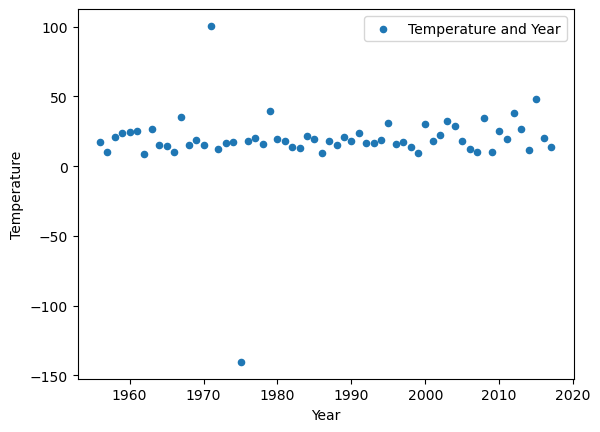

In [3]:
df_temp.plot.scatter(x='Year', y='Temperature', label = 'Temperature and Year')

# output --> noticed that there are a couple of outliers

Create a scatter plot for 'Rainfall'

<Axes: xlabel='Year', ylabel='Rainfall'>

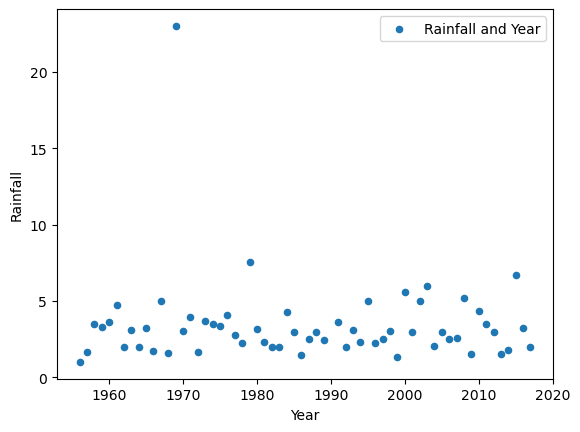

In [4]:
df_rain.plot.scatter(x='Year', y='Rainfall', label = 'Rainfall and Year')

# output --> similar to the Temperature dataframe, there is an outlier

At this point in the analysis, we retrieved data from two different sources, converted both to separate dataframes, and plotted both in the form of scatter plots

Our next task is to use a 'Filter' to remove outliers in the data

Create a 'query' using the original Temperature DataFrame to filter out the outliers that we have observed above

- both conditions have to be true in order to filter the outliers since '& / and' was used

In [5]:
df_temp_f = df_temp.query('Temperature < 40 & Temperature > 0')
print(df_temp_f)

    Year  Temperature
0   1956        16.99
1   1957        10.34
2   1958        21.01
3   1959        23.68
4   1960        24.59
5   1961        25.29
6   1962         8.77
7   1963        26.88
8   1964        15.04
9   1965        14.78
10  1966        10.27
11  1967        35.26
12  1968        15.42
13  1969        18.43
14  1970        14.83
16  1972        12.33
17  1973        16.29
18  1974        16.97
20  1976        17.92
21  1977        20.29
22  1978        15.77
23  1979        39.42
24  1980        19.82
25  1981        17.81
26  1982        13.37
27  1983        12.69
28  1984        21.70
29  1985        19.65
30  1986         9.55
31  1987        18.35
32  1988        15.06
33  1989        20.69
34  1990        17.78
35  1991        24.06
36  1992        16.31
37  1993        16.93
38  1994        18.69
39  1995        31.27
40  1996        16.04
41  1997        17.46
42  1998        13.94
43  1999         9.68
44  2000        30.40
45  2001        18.29
46  2002  

Create a new scatter plot for Temperature

<Axes: xlabel='Year', ylabel='Temperature'>

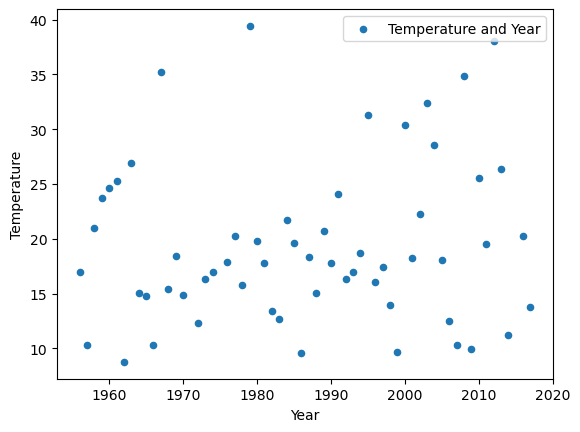

In [6]:
df_temp_f.plot.scatter(x='Year', y='Temperature', label = 'Temperature and Year')

# output --> the outliers are no longer present

Create a query much like you did with the Temperature DataFrame, for 'Rainfall' to get rid of the outliers

In [7]:
df_rain_f = df_rain.query('Rainfall < 6 & Rainfall > 0')

print(df_rain_f)

    Year  Rainfall
0   1956      1.01
1   1957      1.66
2   1958      3.50
3   1959      3.31
4   1960      3.61
5   1961      4.71
6   1962      2.00
7   1963      3.12
8   1964      1.96
9   1965      3.23
10  1966      1.71
11  1967      5.00
12  1968      1.57
14  1970      3.02
15  1971      3.92
16  1972      1.67
17  1973      3.71
18  1974      3.50
19  1975      3.35
20  1976      4.08
21  1977      2.75
22  1978      2.23
24  1980      3.18
25  1981      2.34
26  1982      2.00
27  1983      2.00
28  1984      4.30
29  1985      3.00
30  1986      1.45
31  1987      2.50
32  1988      3.00
33  1989      2.45
34  1991      3.60
35  1992      2.00
36  1993      3.07
37  1994      2.31
38  1995      5.00
39  1996      2.24
40  1997      2.54
41  1998      3.06
42  1999      1.32
43  2000      5.60
44  2001      3.00
45  2002      5.00
47  2004      2.05
48  2005      3.00
49  2006      2.50
50  2007      2.60
51  2008      5.20
52  2009      1.56
53  2010      4.34
54  2011    

<Axes: xlabel='Year', ylabel='Rainfall'>

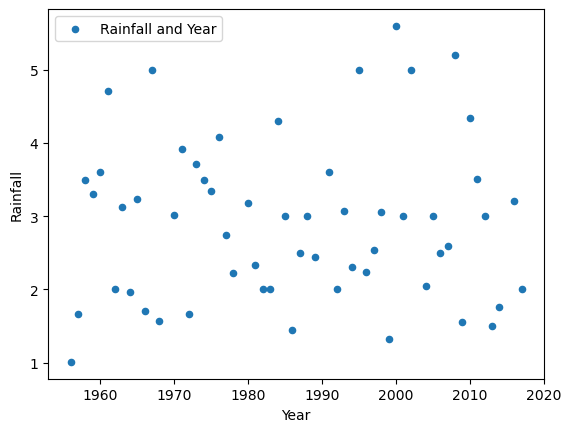

In [8]:
df_rain_f.plot.scatter(x='Year', y='Rainfall', label = 'Rainfall and Year')

At this point in the analysis, we retrieved temperature and rainfall data from two different sources, converted both to separate dataframes, and filtered out outliers in each. Next, we are going to combine the two dataframes using Pandas Merge

Below is some additional information regarding merging DataFrames with Pandas

outer join --> returns all rows from both DataFrames. It will match all rows that exist in both DataFrames. The rows found only in one of the two DataFrames will get the NA value.

inner join --> used to merge two data frames at the intersection. It returns the mutual rows of both.

Merge the two filtered DataFrames, Temperature and Rainfall using an outer join

In [9]:
df_merge_outer = pd.merge(df_temp_f, df_rain_f, on = 'Year', how = 'outer')
print(df_merge_outer)

# 'on' is what column we are merging with

# output --> as you see, for the years 1971 and 1975 a 'NaN' was produced. This occurs with outer joins because there wasn't
# 'Temperature' data for that year, but there was data for 'Rainfall'

    Year  Temperature  Rainfall
0   1956        16.99      1.01
1   1957        10.34      1.66
2   1958        21.01      3.50
3   1959        23.68      3.31
4   1960        24.59      3.61
..   ...          ...       ...
56  2014        11.24      1.76
57  2016        20.29      3.21
58  2017        13.81      2.00
59  1971          NaN      3.92
60  1975          NaN      3.35

[61 rows x 3 columns]


Merge the two filtered DataFrames, Temperature and Rainfall using an inner join

In [10]:
df_merge_inner = pd.merge(df_temp_f, df_rain_f, on = 'Year', how = 'inner')
print(df_merge_inner)

# output --> with the inner join, we no longer have the 'NaN' in the dataset

    Year  Temperature  Rainfall
0   1956        16.99      1.01
1   1957        10.34      1.66
2   1958        21.01      3.50
3   1959        23.68      3.31
4   1960        24.59      3.61
5   1961        25.29      4.71
6   1962         8.77      2.00
7   1963        26.88      3.12
8   1964        15.04      1.96
9   1965        14.78      3.23
10  1966        10.27      1.71
11  1967        35.26      5.00
12  1968        15.42      1.57
13  1970        14.83      3.02
14  1972        12.33      1.67
15  1973        16.29      3.71
16  1974        16.97      3.50
17  1976        17.92      4.08
18  1977        20.29      2.75
19  1978        15.77      2.23
20  1980        19.82      3.18
21  1981        17.81      2.34
22  1982        13.37      2.00
23  1983        12.69      2.00
24  1984        21.70      4.30
25  1985        19.65      3.00
26  1986         9.55      1.45
27  1987        18.35      2.50
28  1988        15.06      3.00
29  1989        20.69      2.45
30  1991

Next, we are going to sort the data of the merged DataFrame

First, sort by temperature using the inner join merged data set -- observe any possible patterns in temperature and rainfall

In [11]:
print(df_merge_inner.sort_values(by='Temperature'))

# output --> 'Temperature' is in ascending order by default

    Year  Temperature  Rainfall
6   1962         8.77      2.00
26  1986         9.55      1.45
38  1999         9.68      1.32
47  2009         9.94      1.56
10  1966        10.27      1.71
45  2007        10.29      2.60
1   1957        10.34      1.66
52  2014        11.24      1.76
14  1972        12.33      1.67
44  2006        12.54      2.50
23  1983        12.69      2.00
22  1982        13.37      2.00
54  2017        13.81      2.00
37  1998        13.94      3.06
9   1965        14.78      3.23
13  1970        14.83      3.02
8   1964        15.04      1.96
28  1988        15.06      3.00
12  1968        15.42      1.57
19  1978        15.77      2.23
35  1996        16.04      2.24
15  1973        16.29      3.71
31  1992        16.31      2.00
32  1993        16.93      3.07
16  1974        16.97      3.50
0   1956        16.99      1.01
36  1997        17.46      2.54
21  1981        17.81      2.34
17  1976        17.92      4.08
43  2005        18.04      3.00
40  2001

Now sort by rainfall using the inner join merged data set -- sort in descending order

In [12]:
print(df_merge_inner.sort_values(by='Rainfall', ascending = False))

    Year  Temperature  Rainfall
39  2000        30.40      5.60
46  2008        34.81      5.20
11  1967        35.26      5.00
34  1995        31.27      5.00
41  2002        22.23      5.00
5   1961        25.29      4.71
48  2010        25.56      4.34
24  1984        21.70      4.30
17  1976        17.92      4.08
15  1973        16.29      3.71
4   1960        24.59      3.61
30  1991        24.06      3.60
49  2011        19.49      3.51
16  1974        16.97      3.50
2   1958        21.01      3.50
3   1959        23.68      3.31
9   1965        14.78      3.23
53  2016        20.29      3.21
20  1980        19.82      3.18
7   1963        26.88      3.12
32  1993        16.93      3.07
37  1998        13.94      3.06
13  1970        14.83      3.02
25  1985        19.65      3.00
43  2005        18.04      3.00
28  1988        15.06      3.00
50  2012        38.01      3.00
40  2001        18.29      3.00
18  1977        20.29      2.75
45  2007        10.29      2.60
36  1997

With the 2 different data sets of temperature and rainfall we have converted both to separate dataframes, filtered out outliers in each, merge the dataframes using inner and outer joins, and sorted in both ascending and descending order to observe potential patterns. Next, we will use Seaborn to create a regression plot

First, set the size 12 by 6

In [13]:
sns.set(rc = {'figure.figsize':(12,6)})

Create a jointplot of rainfall and temperature

jointplot --> create the scatter plot by default with two histograms at the top and right margins of the graph, in the code below we are going to input a regression line

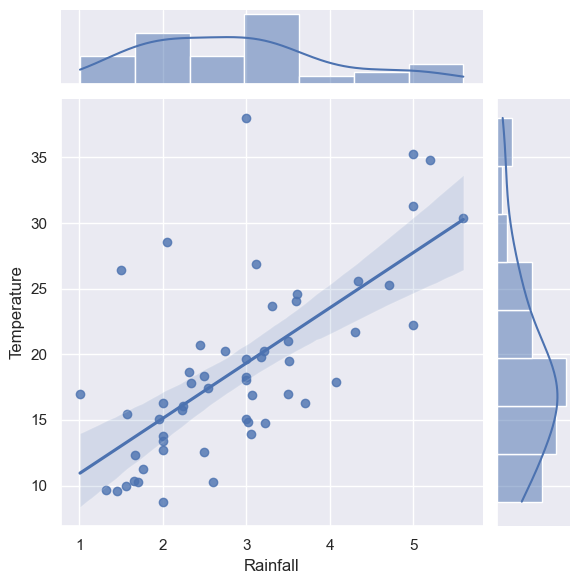

In [14]:
sns.jointplot(data = df_merge_inner, x='Rainfall', y='Temperature', kind = 'reg')

# output --> shows a possible positive correlation of temperature and rainfall

Run a correlation coefficient analysis on the merged dataset. Below is some additional information regarding correlation coefficent (r)

- range is -1 (negative correlation) to +1 (positive correlation)
- value closer to +/- 1 is strong correlation, value closer to 0 is weak correlation

    - very strong correlation: 0.8-1
    - strong correlation: 0.6-0.79
    - moderate correlation: 0.4 - 0.59
    - weak correlation: 0.2 - 0.39
    - very weak correlation: 0 - 0.19

In [16]:
df_merge_inner.corr()

# ouput --> there is a strong positive correlation between 'Temperature' and 'Rainfall' with a correlation coefficient of 0.6741

,Year,Temperature,Rainfall
Year,1.000000,0.126894,0.044767
Temperature,0.126894,1.000000,0.674128
Rainfall,0.044767,0.674128,1.000000


In conclusion, With the 2 different data sets of temperature and rainfall both were converted to separate dataframes, filtered out outliers in each, merged the dataframes using inner and outer joins, and sorted in both ascending and descending order to observe potential patterns. After plotting the inner join merged dataframe in seaborn using a jointplot, it was observed that there is a possible positive correlation between temperature and rainfall. After a statistical analysis, temperature and rainfall have a strong positive correlation, with a correlation coefficient of 0.6741.